# **Hechos y víctimas de suicidios en la República Argentina**

**Integrantes Grupo 5:**


*   Daiana Zarallo
*   Silvana Fernandez
*   Marcia Millan


## **Presentación del tema**




El suicidio es un evento mediante el cual una persona, presumiblemente de manera deliberada, se quita la vida.

La investigación tendrá como objeto brindar información sobre los hechos consumados registrados por las fuerzas policiales, fuerzas federales de seguridad y otras entidades oficiales de recepción de denuncias, en todo el ámbito del territotio de la República Argentina, con el objetivo de determinar las características de los hechos, así como de las personas involucradas, tanto víctimas como testigos.

## **Dataset**

### **Origen del dataset**

La fuente del dataset se podrá consultar a través del siguiente enlance:

https://www.datos.gob.ar/dataset/seguridad-suicidios-sistema-alerta-temprana-estadisticas-criminales-republica-argentina/archivo/seguridad_8.2

### **Descripción del Dataset**

Los principales datos que recaba son: fecha, hora y lugar del hecho, tipo de lugar, modalidad utilizada, motivo que origina el registro, edad, sexo. Cada uno de estas variables se encuentra asociada al código del departamento y localidad donde ocurrió el hecho.


A través de este cuadro se describe en que consiste cada variable del dataset.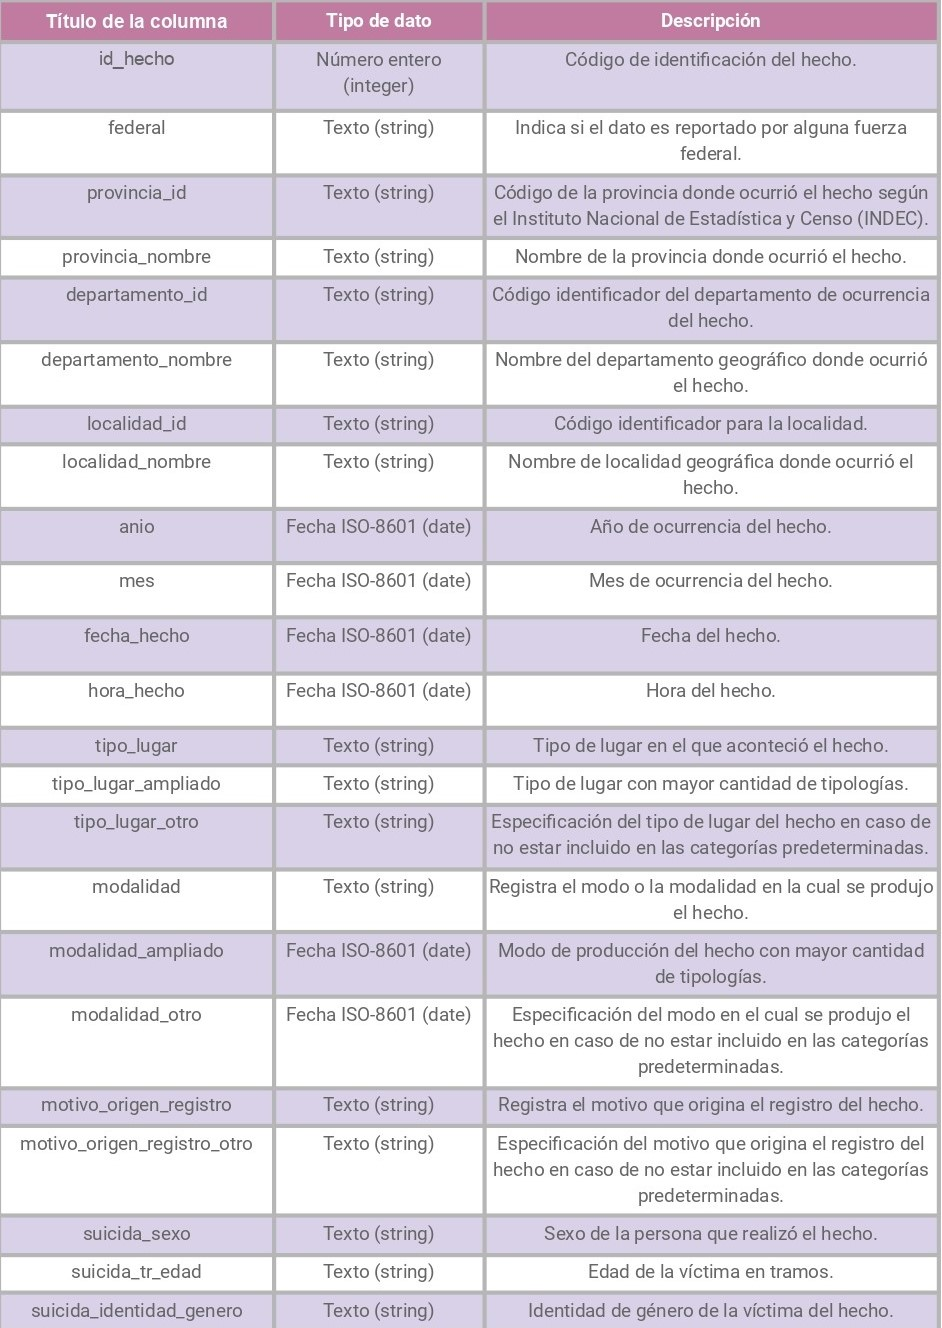


## **Objetivos del Proyecto**


* ¿Cual fue la modalidad mas utilizada para cometer suicidios entre los años 2017 y 2022?
* ¿En que provincia se registraron mas suicidios entre los años 2017 y 2022?
* ¿Cual fue el mes en el que se registraron mas suicidios?
* ¿En que año se registraron mas suicidios?
* ¿Cuáles pueden ser los posibles motivos de estos hechos consumados?
* ¿Las estaciones del año podrían intervenir en este tipo de decisiones?
* ¿En qué meses y época del año hay mas casos?
* ¿La pandemia COVID-19 pudo haber influído en estos hechos?
* ¿El género o identidad de género puede ser motivo para estos casos?


## **Análisis y exploración del Dataset**

### **Importación de librerías**

In [114]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
from scipy import stats

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Leemos los archivos**

In [116]:
#Leemos el data set
#comentar el que no se va usar

#para usar con google colab - drive
url = '/content/drive/MyDrive/tercera_preentrega/SAT-SS-BU_2017-2022.csv'
df=pd.read_csv(url)#(url)


#para leer el dataset localmente
#df = pd.read_csv('SAT-SS-BU_2017-2022.csv', delimiter=',')
#df

**Tipo de dato del dataset**

In [117]:
# Tipo de dato trabajado
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### **Análisis exploratorio**

In [118]:
print(f'El dataset tiene: \n {df.shape[0]} Filas\n {df.shape[1]} Columnas')

El dataset tiene: 
 21719 Filas
 23 Columnas


In [119]:
#Análisis basico para conocer tipos de datos, cantidad de columnas y filas, valores faltantes, variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21719 entries, 0 to 21718
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_hecho                     21719 non-null  int64 
 1   federal                      21719 non-null  object
 2   provincia_id                 21719 non-null  int64 
 3   provincia_nombre             21719 non-null  object
 4   departamento_id              21719 non-null  int64 
 5   departamento_nombre          21719 non-null  object
 6   localidad_id                 21719 non-null  object
 7   localidad_nombre             21719 non-null  object
 8   anio                         21719 non-null  int64 
 9   mes                          21719 non-null  int64 
 10  fecha_hecho                  21719 non-null  object
 11  hora_hecho                   21719 non-null  object
 12  tipo_lugar                   21719 non-null  object
 13  tipo_lugar_ampliado          21

Además de las filas y columnas, observamos que los tipos de datos que el dataset contiene son int y string. Y que también hay columnas con valores faltantes.

**Primeras 10 filas**

In [120]:
# Observamos las 10 primeras filas
df.head(10)

,id_hecho,federal,provincia_id,provincia_nombre,departamento_id,departamento_nombre,localidad_id,localidad_nombre,anio,mes,...,tipo_lugar_ampliado,tipo_lugar_otro,modalidad,modalidad_ampliado,modalidad_otro,motivo_origen_registro,motivo_origen_registro_otro,suicida_sexo,suicida_tr_edad,suicida_identidad_genero
0,8529,No,42,La Pampa,42002,Norte (General Pico),105030,General Pico,2017,1,...,Vía pública,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
1,8530,No,42,La Pampa,42003,Sur (General Acha),70030,Guatraché,2017,1,...,Domicilio particular,NaN,Arma de fuego,Arma de fuego,NaN,Intervención policial,NaN,Masculino,55-59,Sin determinar
2,8569,No,78,Santa Cruz,78021,Güer Aike,60,28 de Noviembre,2017,1,...,Vía pública,NaN,Ahorcamiento,Ahorcamiento,NaN,Denuncia particular,NaN,Masculino,15-19,Sin determinar
3,8705,No,58,Neuquén,58035,Confluencia,70,Neuquén,2017,1,...,Hotel/Motel/Hospedaje temporario,Hotel/Motel/Hospedaje temporario,Arma de fuego,Arma de fuego,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
4,8706,No,58,Neuquén,58035,Confluencia,100,Plottier,2017,1,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
5,8707,No,58,Neuquén,58035,Confluencia,40,Cutral Có,2017,1,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
6,8708,No,58,Neuquén,58049,Huiliches,10,Junín de los Andes,2017,1,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,45-49,Sin determinar
7,8709,No,58,Neuquén,58105,Picunches,30,Las Lajas,2017,1,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,15-19,Sin determinar
8,8710,No,58,Neuquén,58014,Añelo,10,Añelo,2017,2,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,25-29,Sin determinar
9,8754,No,66,Salta,66126,Orán,70,San Ramón de la Nueva Orán (Est. Orán),2017,1,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,Sin determinar,Sin determinar


**Columnas**

In [121]:
#Lista de las columnas

df.columns

Index(['id_hecho', 'federal', 'provincia_id', 'provincia_nombre',
       'departamento_id', 'departamento_nombre', 'localidad_id',
       'localidad_nombre', 'anio', 'mes', 'fecha_hecho', 'hora_hecho',
       'tipo_lugar', 'tipo_lugar_ampliado', 'tipo_lugar_otro', 'modalidad',
       'modalidad_ampliado', 'modalidad_otro', 'motivo_origen_registro',
       'motivo_origen_registro_otro', 'suicida_sexo', 'suicida_tr_edad',
       'suicida_identidad_genero'],
      dtype='object')

**Tipos de datos de cada columna**

In [122]:
#Tipos de datos
df.dtypes

id_hecho                        int64
federal                        object
provincia_id                    int64
provincia_nombre               object
departamento_id                 int64
departamento_nombre            object
localidad_id                   object
localidad_nombre               object
anio                            int64
mes                             int64
fecha_hecho                    object
hora_hecho                     object
tipo_lugar                     object
tipo_lugar_ampliado            object
tipo_lugar_otro                object
modalidad                      object
modalidad_ampliado             object
modalidad_otro                 object
motivo_origen_registro         object
motivo_origen_registro_otro    object
suicida_sexo                   object
suicida_tr_edad                object
suicida_identidad_genero       object
dtype: object

**Comparación de columnas**

Hay columnas en el dataset que contienen datos similares, por lo que se hacen comparaciones a los fines de saber cual columna puede tener mayor cantidad de información.

In [123]:
lugar = np.array_equal(df['tipo_lugar'], df['tipo_lugar_ampliado'])
lugar

False

No hay igualdad en las columnas lugar y tipo_lugar_ampliado.

In [124]:
diferencias_lugar = df[df['tipo_lugar'] != df['tipo_lugar_ampliado']][['tipo_lugar', 'tipo_lugar_ampliado']]
diferencias_lugar

,tipo_lugar,tipo_lugar_ampliado
3,Otro Lugar ( Especificar ),Hotel/Motel/Hospedaje temporario
46,Otro Lugar ( Especificar ),Campo/descampado/zona rural
47,Otro Lugar ( Especificar ),Establecimiento comercial
55,Otro Lugar ( Especificar ),Campo/descampado/zona rural
90,Otro Lugar ( Especificar ),Río/canal/arroyo/mar/dique
...,...,...
21663,Otro Lugar ( Especificar ),Hotel/Motel/Hospedaje temporario
21664,Otro Lugar ( Especificar ),Establecimiento de salud/salud mental
21670,Otro Lugar ( Especificar ),Establecimiento de salud/salud mental
21671,Otro Lugar ( Especificar ),Establecimiento de salud/salud mental


Son 857 filas que difieren, por lo que se observa que en la columna tipo_lugar_ampliado hay mas información que en la columna lugar.

In [125]:
modalidad = np.array_equal(df['modalidad'], df['modalidad_ampliado'])
modalidad


False

Se observa que entre las columnas modalidad y modalidad_ampliado no hay igualdad de datos.

In [126]:
diferencias_modalidad = df[df['modalidad'] != df['modalidad_ampliado']][['modalidad', 'modalidad_ampliado']]
diferencias_modalidad

,modalidad,modalidad_ampliado
1922,Otra modalidad,Se arroja bajo rodado (camion/automóvil/colect...
1930,Otra modalidad,Se arroja bajo rodado (camion/automóvil/colect...
2056,Otra modalidad,Se arroja bajo rodado (camion/automóvil/colect...
2382,Otra modalidad,Se arroja bajo rodado (camion/automóvil/colect...
3088,Otra modalidad,Se arroja bajo rodado (camion/automóvil/colect...
3247,Otra modalidad,Se arroja bajo rodado (camion/automóvil/colect...
3461,Otra modalidad,Se arroja bajo rodado (camion/automóvil/colect...
3898,Otra modalidad,Se arroja bajo rodado (camion/automóvil/colect...
5244,Otra modalidad,Se arroja bajo rodado (camion/automóvil/colect...
5515,Otra modalidad,Se arroja bajo rodado (camion/automóvil/colect...


En resumen, con estas comparaciones podemos ver que las columnas lugar_ampliado y modalidad_ampliado contienen mayor información.

**Renombrar columnas**

In [127]:

#Definir los nuevos nombres de las columnas

nuevos_nombres = {
    "provincia_nombre":"provincia",
    "tipo_lugar": "lugar",
    "tipo_lugar_ampliado": "lugar_hecho",
    "suicida_sexo":"sexo",
    "suicida_tr_edad":"rango_de_edad",
    "suicida_identidad_genero":"genero",
    "motivo_origen_registro": "registro",
    "modalidad_ampliado": "modalidad_hecho"
    }

#Renombrar las columnas
df_2= df.rename(columns=nuevos_nombres)
df_2



,id_hecho,federal,provincia_id,provincia,departamento_id,departamento_nombre,localidad_id,localidad_nombre,anio,mes,...,lugar_hecho,tipo_lugar_otro,modalidad,modalidad_hecho,modalidad_otro,registro,motivo_origen_registro_otro,sexo,rango_de_edad,genero
0,8529,No,42,La Pampa,42002,Norte (General Pico),105030,General Pico,2017,1,...,Vía pública,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
1,8530,No,42,La Pampa,42003,Sur (General Acha),70030,Guatraché,2017,1,...,Domicilio particular,NaN,Arma de fuego,Arma de fuego,NaN,Intervención policial,NaN,Masculino,55-59,Sin determinar
2,8569,No,78,Santa Cruz,78021,Güer Aike,60,28 de Noviembre,2017,1,...,Vía pública,NaN,Ahorcamiento,Ahorcamiento,NaN,Denuncia particular,NaN,Masculino,15-19,Sin determinar
3,8705,No,58,Neuquén,58035,Confluencia,70,Neuquén,2017,1,...,Hotel/Motel/Hospedaje temporario,Hotel/Motel/Hospedaje temporario,Arma de fuego,Arma de fuego,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
4,8706,No,58,Neuquén,58035,Confluencia,100,Plottier,2017,1,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21714,37640,No,18,Corrientes,18049,Esquina,10,Esquina,2022,7,...,Cárcel o comisaría,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,30-34,Varón
21715,37642,No,18,Corrientes,18070,Goya,20,Goya,2022,9,...,Domicilio particular,NaN,Sin determinar,Sin determinar,NaN,Intervención policial,NaN,Masculino,50-54,Varón
21716,37643,No,18,Corrientes,18070,Goya,20,Goya,2022,9,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,15-19,Varón
21717,37639,No,18,Corrientes,18133,San Cosme,30,San Cosme,2022,7,...,Campo/descampado/zona rural,Campo/descampado/zona rural,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,30-34,Varón


A las siguientes columnas se les reasigno un nombre:

    * provincia_nombre: provincia
    * tipo_lugar: lugar
    * tipo_lugar_ampliado: lugar_hecho
    * suicida_sexo: sexo
    * suicida_tr_edad: rango_de_edad
    * suicida_identidad_genero: genero
    * motivo_origen_registro: registro
    * modalidad_ampliado: modalidad_hecho

In [128]:
#Guardamos en una nueva planilla los cambios realizados
df_2.to_csv('df_sui_renombrado.csv', index=False)


Se renombraron algunas columnas para ser mas fácil de identificar, por lo que se creo un nuevo dataframe con los cambios realizados.

A partir de ahora en adelante se utilizara la copia del dataset con los cambios que se vayan modificando y conservar el original en su estado.-

**Lista de columnas renombradas**


In [129]:
df_2.columns.tolist()

['id_hecho',
 'federal',
 'provincia_id',
 'provincia',
 'departamento_id',
 'departamento_nombre',
 'localidad_id',
 'localidad_nombre',
 'anio',
 'mes',
 'fecha_hecho',
 'hora_hecho',
 'lugar',
 'lugar_hecho',
 'tipo_lugar_otro',
 'modalidad',
 'modalidad_hecho',
 'modalidad_otro',
 'registro',
 'motivo_origen_registro_otro',
 'sexo',
 'rango_de_edad',
 'genero']

**División de grupos por columna**

In [130]:
#Vemos cuál es la división de grupos para cada una de las columnas.
print(f'Los hechos registrados son: {df_2.id_hecho.count()}')
print('\n')
print(f'Las provincias registradas por su ID son: ')
df_sorted = df_2.sort_values(by='provincia_id')
ids = set()
for index, row in df_sorted.iterrows():
  if row['provincia_id'] in ids:
    continue
  print(f'ID: {row["provincia_id"]}, Provincia: {row["provincia"]}')
  ids.add(row['provincia_id'])
print('\n')
print(f'Los hechos registrados por año son:\n{df_2.anio.value_counts()}')
print('\n')
print(f'Los hechos registrados por meses son:\n{df_2.mes.value_counts()}')
print('\n')
print(f'Los hechos registrados por hora son: {df_2.hora_hecho.value_counts()}')
print('\n')
print(f'Los hechos registrados por lugar del hecho son:\n{df_2.lugar_hecho.value_counts()}')
print('\n')
print(f'Los hechos registrados por modalidad del hecho son:\n{df_2.modalidad_hecho.value_counts()}')
print('\n')
print(f'Los hechos registrados por motivo de origen son:\n{df_2.registro.value_counts()}')
print('\n')
print(f'Los hechos registrados por sexo son:\n{df_2.sexo.value_counts()}')



Los hechos registrados son: 21719


Las provincias registradas por su ID son: 
ID: 2, Provincia: Ciudad Autónoma de Buenos Aires
ID: 6, Provincia: Buenos Aires
ID: 10, Provincia: Catamarca
ID: 14, Provincia: Córdoba
ID: 18, Provincia: Corrientes
ID: 22, Provincia: Chaco
ID: 26, Provincia: Chubut
ID: 30, Provincia: Entre Ríos
ID: 34, Provincia: Formosa
ID: 38, Provincia: Jujuy
ID: 42, Provincia: La Pampa
ID: 46, Provincia: La Rioja
ID: 50, Provincia: Mendoza
ID: 54, Provincia: Misiones
ID: 58, Provincia: Neuquén
ID: 62, Provincia: Río Negro
ID: 66, Provincia: Salta
ID: 70, Provincia: San Juan
ID: 74, Provincia: San Luis
ID: 78, Provincia: Santa Cruz
ID: 82, Provincia: Santa Fe
ID: 86, Provincia: Santiago del Estero
ID: 90, Provincia: Tucumán
ID: 94, Provincia: Tierra del Fuego, Antártida e Islas del Atlántico Sur


Los hechos registrados por año son:
anio
2022    3955
2018    3903
2021    3648
2019    3647
2017    3304
2020    3262
Name: count, dtype: int64


Los hechos registrados por 

**Edad mínima y máxima de suicidios**

In [131]:
#El rango mínimo de edad
rango_minimo = df_2["rango_de_edad"].min()
print(f'El rango mínimo de edad de suicidios consumados es entre los {rango_minimo} años')


El rango mínimo de edad de suicidios consumados es entre los 10-14 años


In [132]:
#El rango máximo de edad
edad_filtrada = df_2[df_2['rango_de_edad'] != 'Sin determinar']
rango_maximo = edad_filtrada['rango_de_edad'].max()

print(f'El rango máximo de edad de suicidios consumados es entre los {rango_maximo} años')

El rango máximo de edad de suicidios consumados es entre los 90 y más años


**Cantidad de suicidios por provincia, año, lugar, modalidad, sexo y genero**

In [133]:
#Vemos cuantas personas se suicidaron por cada provincia, año, lugar, modalidad, edad, sexo y genero

pd_grupos = df_2.groupby(['provincia', 'anio', 'lugar_hecho', 'rango_de_edad', 'sexo', 'genero', 'modalidad_hecho']).size().reset_index(name='cantidad') #modifique para que solo muestre las columnas seleccionadas
pd_grupos


,provincia,anio,lugar_hecho,rango_de_edad,sexo,genero,modalidad_hecho,cantidad
0,Buenos Aires,2017,Campo/descampado/zona rural,25-29,Masculino,Sin determinar,Ahorcamiento,1
1,Buenos Aires,2017,Cárcel o comisaría,25-29,Femenino,Sin determinar,Ahorcamiento,1
2,Buenos Aires,2017,Cárcel o comisaría,30-34,Masculino,Sin determinar,Ahorcamiento,1
3,Buenos Aires,2017,Cárcel o comisaría,40-44,Masculino,Sin determinar,Ahorcamiento,4
4,Buenos Aires,2017,Cárcel o comisaría,Sin determinar,Masculino,Sin determinar,Ahorcamiento,1
...,...,...,...,...,...,...,...,...
9203,Tucumán,2022,Vía pública,40-44,Masculino,Varón,Ahorcamiento,1
9204,Tucumán,2022,Vía pública,45-49,Masculino,Varón,Ahorcamiento,1
9205,Tucumán,2022,Vía pública,50-54,Masculino,Varón,Ahorcamiento,1
9206,Tucumán,2022,Vía pública,75-79,Masculino,Varón,Ahorcamiento,1


**Cantidad de suicidios por provincia y modalidad**

In [134]:
#Vemos cuales fueron las provincias con mayor cantidad de suicidios.

pd_total_por_provincia = df_2.groupby('provincia')['modalidad_hecho'].value_counts().reset_index(name='cantidad')
pd_total_por_provincia = pd_total_por_provincia.sort_values(by='provincia')
pd_total_por_provincia

,provincia,modalidad_hecho,cantidad
0,Buenos Aires,Ahorcamiento,3695
1,Buenos Aires,Sin determinar,1133
2,Buenos Aires,Arma de fuego,1128
3,Buenos Aires,Se arroja a las vías de FF.CC.,238
4,Buenos Aires,Envenenamiento,129
...,...,...,...
201,Tucumán,Se arroja al vacío,8
202,Tucumán,Sin determinar,7
203,Tucumán,Se incinera,2
204,Tucumán,Arma blanca / elemento cortante,1


**Cantidad total de suicidios por provincia de mayor a menor casos**

In [135]:
#Cantidad total de suicidios consumados por provincia de mayor a menor
total_casos_por_provincia = df_2.groupby(['provincia']).size().reset_index(name='total_casos')
total_casos_por_provincia = total_casos_por_provincia.sort_values(by='total_casos', ascending=False)
total_casos_por_provincia = total_casos_por_provincia.reset_index(drop=True)
total_casos_por_provincia

,provincia,total_casos
0,Buenos Aires,6550
1,Santa Fe,2138
2,Córdoba,1475
3,Ciudad Autónoma de Buenos Aires,1328
4,Entre Ríos,1298
5,Mendoza,1197
6,Salta,1102
7,Tucumán,783
8,Santiago del Estero,712
9,Chaco,643


**Cantidad total y promedio de suicidios por modalidad a nivel nacional de mayor a menor casos**

In [136]:
total_casos_por_modalidad = df_2.groupby(['modalidad_hecho']).size().reset_index(name='total_casos')
total_casos_por_modalidad['promedio_modalidad'] = total_casos_por_modalidad['total_casos'] / total_casos_por_modalidad['total_casos'].sum() * 100
total_casos_por_modalidad = total_casos_por_modalidad.sort_values(by='total_casos', ascending=False).round(2)
total_casos_por_modalidad = total_casos_por_modalidad.reset_index(drop=True)
total_casos_por_modalidad


,modalidad_hecho,total_casos,promedio_modalidad
0,Ahorcamiento,14651,67.46
1,Arma de fuego,3454,15.90
2,Sin determinar,1381,6.36
3,Se arroja al vacío,755,3.48
4,Envenenamiento,576,2.65
5,Se arroja a las vías de FF.CC.,279,1.28
6,Arma blanca / elemento cortante,265,1.22
7,Sumersión en piscina / mar / río,171,0.79
8,Se incinera,133,0.61
9,Se arroja bajo rodado (camion/automóvil/colect...,36,0.17


Podemos ver que la modalidad más utilizada para este tipo de hecho es el Ahorcamiento, representando un promedio del 67.46%.-

In [137]:
#Modalidad del hecho y genero de quien lo cometio

pd.crosstab(df_2['modalidad_hecho'], df_2['genero'])

genero,Mujer,Mujer trans/travesti,Sin determinar,Varón,Varón trans
modalidad_hecho,,,,,
Ahorcamiento,959,4,10139,3548,1
Arma blanca / elemento cortante,19,0,188,58,0
Arma de fuego,91,0,2456,907,0
Envenenamiento,103,0,397,76,0
Otra modalidad,1,0,14,3,0
Se arroja a las vías de FF.CC.,13,0,203,63,0
Se arroja al vacío,156,0,385,214,0
Se arroja bajo rodado (camion/automóvil/colectivo),2,0,25,9,0
Se incinera,20,0,90,23,0


In [138]:
# Rango de edad y sexo
pd.crosstab(df_2['rango_de_edad'], df_2['sexo'])

sexo,Femenino,Masculino,Sin determinar
rango_de_edad,,,
10-14,178,194,0
15-19,648,1691,4
20-24,571,2393,3
25-29,467,2119,1
30-34,366,1639,2
35-39,327,1318,0
40-44,325,1154,0
45-49,268,936,0
5-9,3,10,0


**Valores faltantes y Limpieza de datos**

In [139]:
#Chequear si el dataset tiene valores faltantes
df_2.isna().any()

id_hecho                       False
federal                        False
provincia_id                   False
provincia                      False
departamento_id                False
departamento_nombre            False
localidad_id                   False
localidad_nombre               False
anio                           False
mes                            False
fecha_hecho                    False
hora_hecho                     False
lugar                          False
lugar_hecho                    False
tipo_lugar_otro                 True
modalidad                      False
modalidad_hecho                False
modalidad_otro                  True
registro                       False
motivo_origen_registro_otro     True
sexo                           False
rango_de_edad                  False
genero                         False
dtype: bool

El dataset si tiene valores faltantes. Las columnas en las cuales hay valores faltantes son 3: 'tipo_lugar_otro', 'modalidad_otro' y 'motivo_origen_registro_otro'.

In [140]:
#Cantidad de valores faltantes por columna
df_2.isna().sum()

id_hecho                           0
federal                            0
provincia_id                       0
provincia                          0
departamento_id                    0
departamento_nombre                0
localidad_id                       0
localidad_nombre                   0
anio                               0
mes                                0
fecha_hecho                        0
hora_hecho                         0
lugar                              0
lugar_hecho                        0
tipo_lugar_otro                20446
modalidad                          0
modalidad_hecho                    0
modalidad_otro                 21494
registro                           0
motivo_origen_registro_otro    21705
sexo                               0
rango_de_edad                      0
genero                             0
dtype: int64

In [141]:
#Representación en porcentaje de valores faltantes
df_2.isna().sum()/df_2.shape[0] * 100

id_hecho                        0.000000
federal                         0.000000
provincia_id                    0.000000
provincia                       0.000000
departamento_id                 0.000000
departamento_nombre             0.000000
localidad_id                    0.000000
localidad_nombre                0.000000
anio                            0.000000
mes                             0.000000
fecha_hecho                     0.000000
hora_hecho                      0.000000
lugar                           0.000000
lugar_hecho                     0.000000
tipo_lugar_otro                94.138773
modalidad                       0.000000
modalidad_hecho                 0.000000
modalidad_otro                 98.964041
registro                        0.000000
motivo_origen_registro_otro    99.935540
sexo                            0.000000
rango_de_edad                   0.000000
genero                          0.000000
dtype: float64

Si bien representan un porcentaje alto en valores faltantes, estas variables no son relevantes para nuestro análisis ya que la información se encuentran en otras variables.

In [142]:
#Eliminamos las columnas con datos faltantes.-
df_2_sin_faltantes = df_2.dropna(axis=1)
df_2 = df_2_sin_faltantes

In [143]:
#Volvemos a consultar si hay datos faltantes
df_2.isna().any()

id_hecho               False
federal                False
provincia_id           False
provincia              False
departamento_id        False
departamento_nombre    False
localidad_id           False
localidad_nombre       False
anio                   False
mes                    False
fecha_hecho            False
hora_hecho             False
lugar                  False
lugar_hecho            False
modalidad              False
modalidad_hecho        False
registro               False
sexo                   False
rango_de_edad          False
genero                 False
dtype: bool

Modificado el dataset, consultamos y confirmamos que ya no contienen valores faltantes.

### **Visualizaciones gráficas**

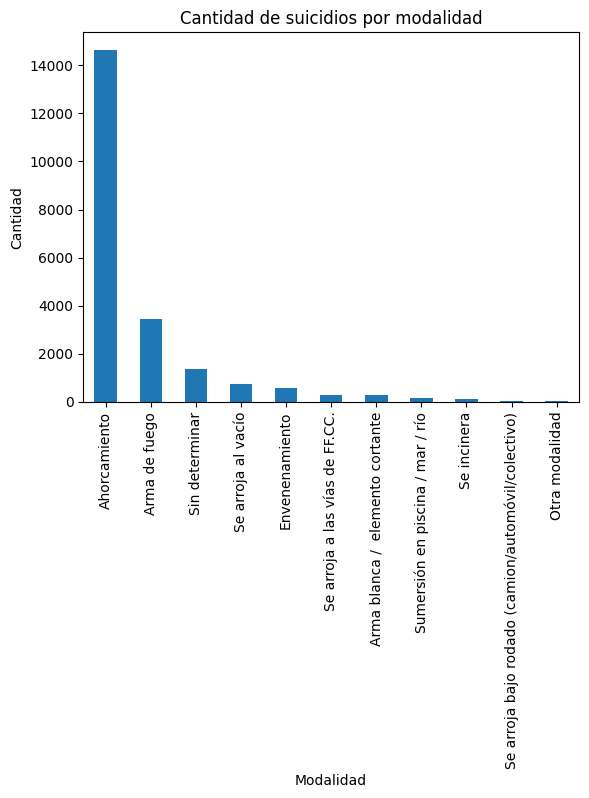

In [144]:
#Graficamos el total de casos por modalidad
pd_total_por_provincia.groupby('modalidad_hecho')['cantidad'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Cantidad de suicidios por modalidad')
plt.xlabel('Modalidad')
plt.ylabel('Cantidad')
plt.show()

Se cuenta la cantidad de suicidios por provincia diferenciando su modalidad

<Axes: ylabel='provincia'>

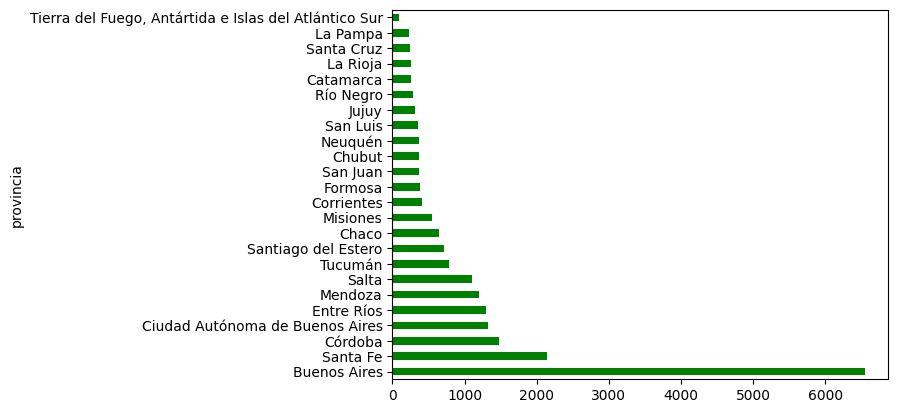

In [145]:
# Cantidad de suicidios por provincia.

pd_total_por_provincia.groupby('provincia')['cantidad'].sum().sort_values(ascending=False).plot(kind='barh', color='green')


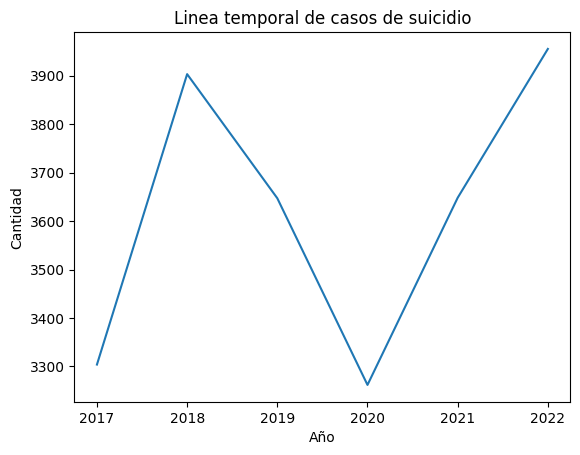

In [146]:
#Gráfico de línea temporal para ver la evolución el número de suicidios.

su_anio= df_2.anio.value_counts().sort_index()
su_anio.plot()
plt.title('Linea temporal de casos de suicidio')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()


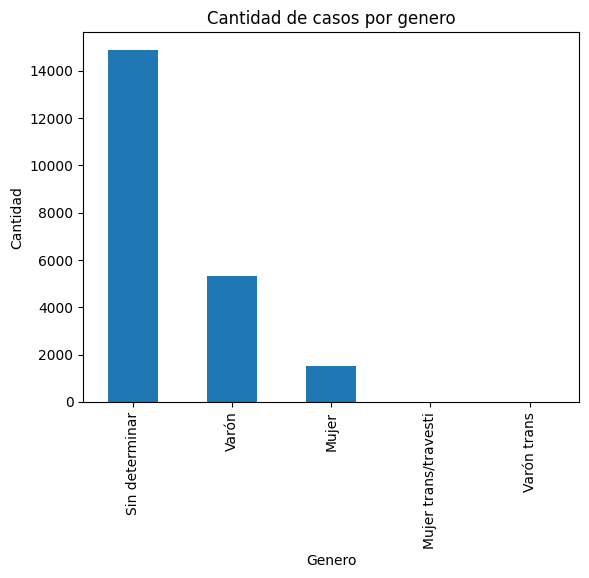

In [147]:
# Cantidad de casos por género (identidad)
genero= df_2.genero.value_counts().sort_values(ascending=False)
genero.plot(kind='bar')
plt.title('Cantidad de casos por genero')
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.show()


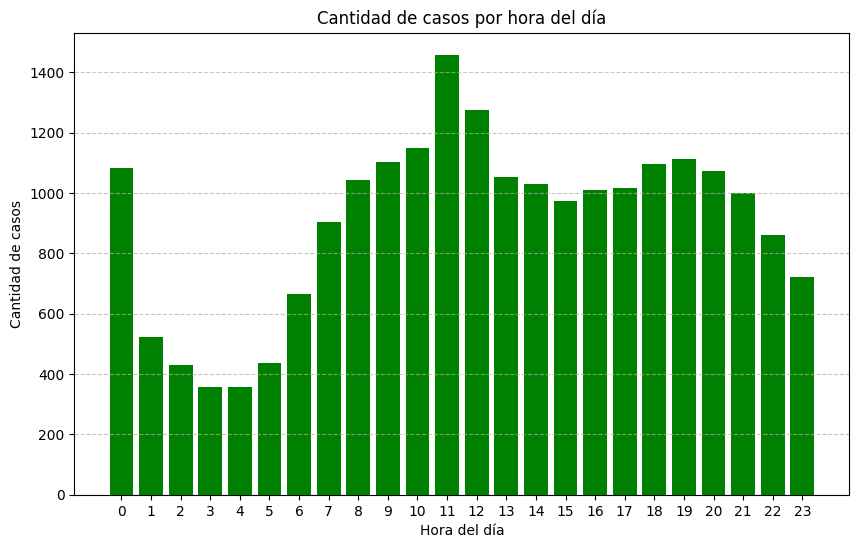

In [148]:
#Casos por horas del día

horas = pd.to_datetime(df_2['hora_hecho'], format='%H:%M:%S').dt.hour
ocurrencias_por_hora = horas.groupby(horas).size().reset_index(name='cantidad_casos')


plt.figure(figsize=(10, 6))
plt.bar(ocurrencias_por_hora['hora_hecho'], ocurrencias_por_hora['cantidad_casos'], color='green')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de casos')
plt.title('Cantidad de casos por hora del día')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **Procesamiento de datos**

### Transformacion de Variables

In [37]:
df_2.columns.to_list()

['id_hecho',
 'federal',
 'provincia_id',
 'provincia',
 'departamento_id',
 'departamento_nombre',
 'localidad_id',
 'localidad_nombre',
 'anio',
 'mes',
 'fecha_hecho',
 'hora_hecho',
 'lugar',
 'lugar_hecho',
 'modalidad',
 'modalidad_hecho',
 'registro',
 'sexo',
 'rango_de_edad',
 'genero']

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
encoder = LabelEncoder()

In [40]:
#En esta variable guardo las columnas que quiero modificar
columnas_mod = ['lugar_hecho', 'modalidad_hecho', 'rango_de_edad', 'sexo']
for column in columnas_mod:
    df_2[column] = encoder.fit_transform(df_2[column])

<ipython-input-40-103d1094c873>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[column] = encoder.fit_transform(df_2[column])
<ipython-input-40-103d1094c873>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[column] = encoder.fit_transform(df_2[column])
<ipython-input-40-103d1094c873>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [41]:
#La columna de hora_hecho tiene un formato que no nos resulta tan útil, para ello deajaremos solo la hora, sin tener en cuenta minutos o segundos
df_2['hora_hecho'] = pd.to_datetime(df_2['hora_hecho'], format='%H:%M:%S').dt.hour
df_2

<ipython-input-41-c429d6ce9b7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['hora_hecho'] = pd.to_datetime(df_2['hora_hecho'], format='%H:%M:%S').dt.hour


,id_hecho,federal,provincia_id,provincia,departamento_id,departamento_nombre,localidad_id,localidad_nombre,anio,mes,fecha_hecho,hora_hecho,lugar,lugar_hecho,modalidad,modalidad_hecho,registro,sexo,rango_de_edad,genero
0,8529,No,42,La Pampa,42002,Norte (General Pico),105030,General Pico,2017,1,08-01-2017,13,Vía pública,10,Ahorcamiento,0,Intervención policial,1,2,Sin determinar
1,8530,No,42,La Pampa,42003,Sur (General Acha),70030,Guatraché,2017,1,09-01-2017,1,Domicilio particular,2,Arma de fuego,2,Intervención policial,1,10,Sin determinar
2,8569,No,78,Santa Cruz,78021,Güer Aike,60,28 de Noviembre,2017,1,01-01-2017,19,Vía pública,10,Ahorcamiento,0,Denuncia particular,1,1,Sin determinar
3,8705,No,58,Neuquén,58035,Confluencia,70,Neuquén,2017,1,31-01-2017,17,Otro Lugar ( Especificar ),6,Arma de fuego,2,Intervención policial,1,2,Sin determinar
4,8706,No,58,Neuquén,58035,Confluencia,100,Plottier,2017,1,31-01-2017,22,Domicilio particular,2,Ahorcamiento,0,Intervención policial,1,2,Sin determinar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21714,37640,No,18,Corrientes,18049,Esquina,10,Esquina,2022,7,09-07-2022,7,Cárcel o comisaría,1,Ahorcamiento,0,Intervención policial,1,4,Varón
21715,37642,No,18,Corrientes,18070,Goya,20,Goya,2022,9,11-09-2022,5,Domicilio particular,2,Sin determinar,9,Intervención policial,1,9,Varón
21716,37643,No,18,Corrientes,18070,Goya,20,Goya,2022,9,27-09-2022,6,Domicilio particular,2,Ahorcamiento,0,Intervención policial,1,1,Varón
21717,37639,No,18,Corrientes,18133,San Cosme,30,San Cosme,2022,7,15-07-2022,8,Otro Lugar ( Especificar ),0,Ahorcamiento,0,Intervención policial,1,4,Varón


In [42]:
#Reviso los tipos de datos que cambiaron a numerico
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21719 entries, 0 to 21718
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_hecho             21719 non-null  int64 
 1   federal              21719 non-null  object
 2   provincia_id         21719 non-null  int64 
 3   provincia            21719 non-null  object
 4   departamento_id      21719 non-null  int64 
 5   departamento_nombre  21719 non-null  object
 6   localidad_id         21719 non-null  object
 7   localidad_nombre     21719 non-null  object
 8   anio                 21719 non-null  int64 
 9   mes                  21719 non-null  int64 
 10  fecha_hecho          21719 non-null  object
 11  hora_hecho           21719 non-null  int32 
 12  lugar                21719 non-null  object
 13  lugar_hecho          21719 non-null  int64 
 14  modalidad            21719 non-null  object
 15  modalidad_hecho      21719 non-null  int64 
 16  regi

In [43]:
df_2.describe()

,id_hecho,provincia_id,departamento_id,anio,mes,hora_hecho,lugar_hecho,modalidad_hecho,sexo,rango_de_edad
count,21719.000000,21719.000000,21719.000000,21719.000000,21719.000000,21719.000000,21719.000000,21719.000000,21719.000000,21719.000000
mean,23437.769372,35.450711,35627.076339,2019.548460,6.656384,12.539528,3.490262,1.397532,0.798610,6.395322
std,8572.752152,30.898772,30790.250768,1.717109,3.578070,6.365172,3.061647,2.632664,0.412928,4.873923
min,8529.000000,2.000000,2001.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15932.500000,6.000000,6490.000000,2018.000000,3.000000,8.000000,2.000000,0.000000,1.000000,2.000000
50%,23358.000000,26.000000,26021.000000,2020.000000,7.000000,13.000000,2.000000,0.000000,1.000000,5.000000
75%,30770.500000,66.000000,66028.000000,2021.000000,10.000000,18.000000,2.000000,2.000000,1.000000,10.000000
max,38831.000000,94.000000,94999.000000,2022.000000,12.000000,23.000000,11.000000,10.000000,2.000000,18.000000
